### Ejercicio regresión polinomial

#### Utilizando los modelos de regresión vistos hasta ahora, genera el modelo que mejor se adapte a los datos adjuntos. La pregunta objetivo es: ¿Cuál es la longitud del pez bluegill en función de su edad?


#### En 1981, 78 diferentes peces bluegills fueron aleatoriamente caracterizados según su longitud y edad de un lago de Minnesota. Los investigadores midieron y grabaron los datos que se adjuntan. 

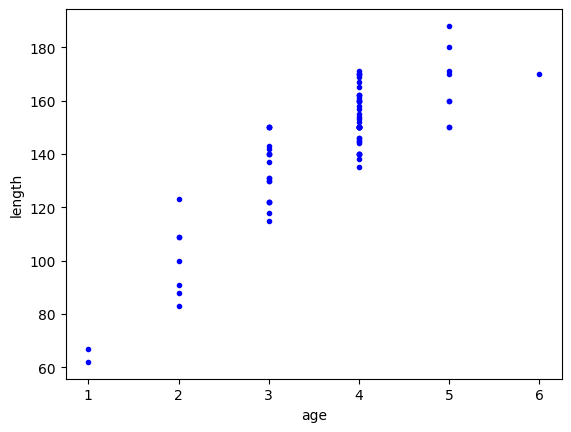

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df = pd.read_csv("Datos mojarra americana.txt", delimiter='\t')
x = np.array(df['age']).reshape(-1, 1)
y = np.array(df['length'])
plt.plot(x, y, 'b.')
plt.xlabel("age")
plt.ylabel("length")
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

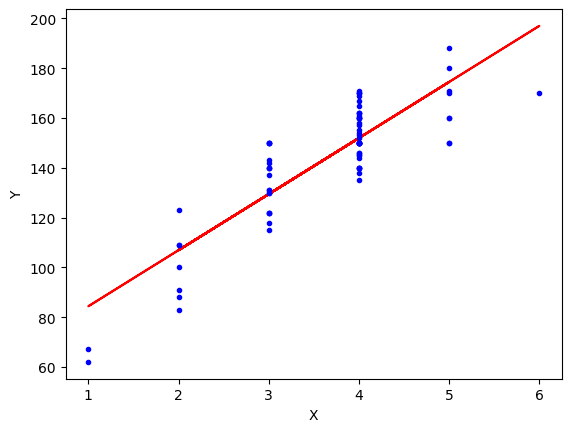

In [5]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
mse_linear_adjusted = mean_squared_error(y_test, y_pred)
r2_linear_adjusted = r2_score(y_test, y_pred)
print(mse_linear_adjusted)
print(r2_linear_adjusted)
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))

160.67443601637288
0.7717642014194237
RMSE 12.675742030207655
MAE 10.480607876712336


In [7]:
poly = PolynomialFeatures(degree=2)  
x_poly = poly.fit_transform(x)
x_train_poly, x_test_poly, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=2)
lr.fit(x_train_poly, y_train)
y_pred_poly = lr.predict(x_test_poly)

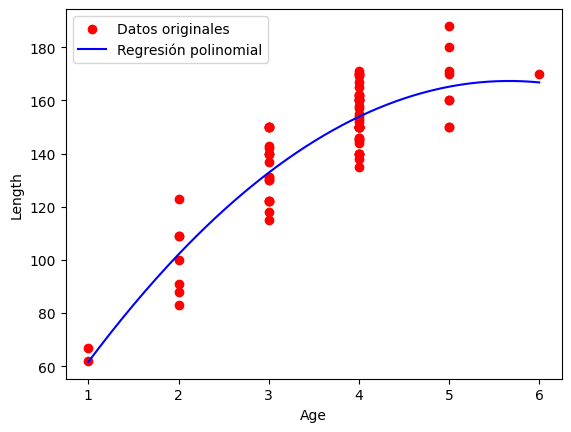

In [8]:
# 1. Generar un rango de valores 'x' para la visualización
x_vis = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)  # Ajusta 300 según la suavidad deseada

# 2. Transformar los valores 'x' para la visualización
x_vis_poly = poly.transform(x_vis)

# 3. Hacer predicciones sobre los valores 'x' transformados
y_pred = lr.predict(x_vis_poly)

# 4. Graficar los datos originales y la curva de regresión
plt.scatter(x, y, color='red', label='Datos originales')  # Datos originales como puntos
plt.plot(x_vis, y_pred, color='blue', label='Regresión polinomial')  # Curva de regresión
plt.xlabel("Age")
plt.ylabel("Length")
plt.legend()
plt.show()

In [9]:
mse_linear_adjusted = mean_squared_error(y_test, y_pred_poly)
r2_linear_adjusted = r2_score(y_test, y_pred_poly)
print(mse_linear_adjusted)
print(r2_linear_adjusted)
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_poly)))
print("MAE",mean_absolute_error(y_test,y_pred_poly))

110.47774534805626
0.8430679014032716
RMSE 10.51083942166639
MAE 8.541685489700033
